Coef: 42.38550485581797


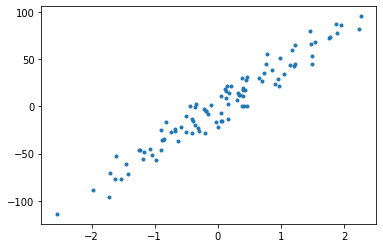

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

x, y, coef = datasets.make_regression(
                                n_samples=100, 
                                n_features=1,
                                coef=True,
                                noise=10,
                                random_state=0
                                )
print("Coef:", coef)

plt.ion()
_ = plt.plot(x,y, ".", label="training data")

[42.61943029]


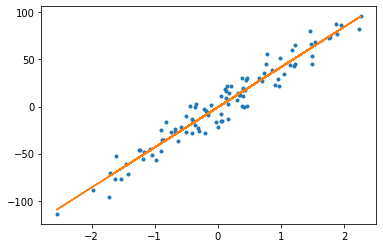

In [2]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred = linear_model.predict(x)

print(linear_model.coef_)

plt.ion()
_ = plt.plot(x,y, ".", label="training data")
_ = plt.plot(x, y_pred)

### Custom Linear Regression (Gradien Descend Method)
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931


Coef: 42.38550485581797
Epoch: 0, best: 1962.34 | m: [0.00867954], c: [0.00034696]


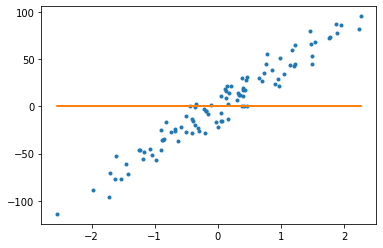

Epoch: 1000, best: 1343.14 | m: [7.85809303], c: [0.26931033]


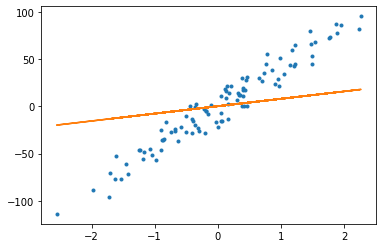

Epoch: 2000, best: 931.86 | m: [14.25745363], c: [0.41279152]


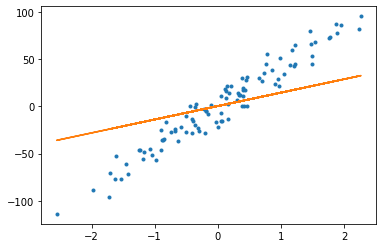

Epoch: 3000, best: 658.53 | m: [19.47537629], c: [0.46770757]


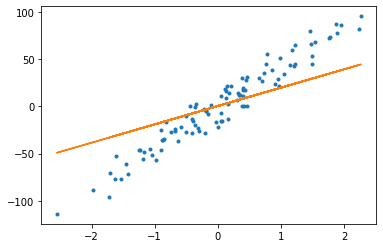

Epoch: 4000, best: 476.78 | m: [23.73058275], c: [0.46165903]


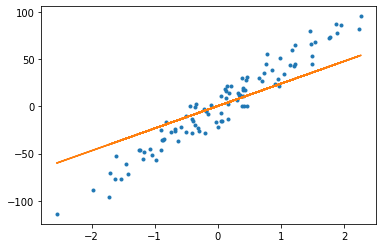

Epoch: 5000, best: 355.85 | m: [27.20119284], c: [0.41510622]


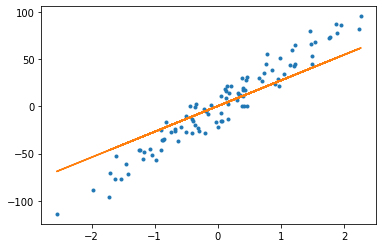

Epoch: 6000, best: 275.34 | m: [30.03228128], c: [0.3430601]


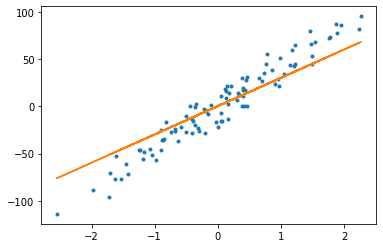

Epoch: 7000, best: 221.72 | m: [32.34202441], c: [0.25639295]


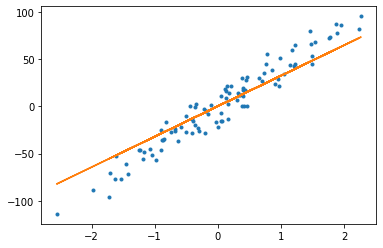

Epoch: 8000, best: 185.98 | m: [34.22670067], c: [0.16285136]


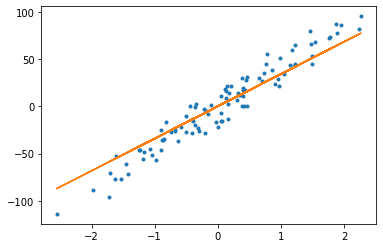

Epoch: 9000, best: 162.14 | m: [35.76475916], c: [0.06783676]


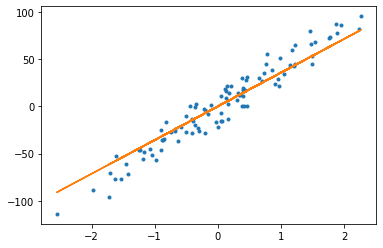

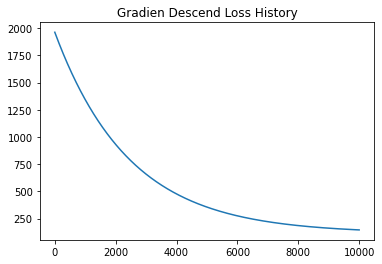

In [3]:
x, y, coef = datasets.make_regression(
                                n_samples=100, 
                                n_features=1,
                                coef=True,
                                noise=10,
                                random_state=0
                                )
print("Coef:", coef)

def loss_function_gradien_descend(y_actual, y_pred):
    n = len(y_actual)
    if n < 1:
        return -1
    sum = 0
    for i in range(n):
        sum += (y_actual[i] - y_pred[i]) ** 2
    return sum / n

def calculate_partial_derivateive_for_m(x_train, y_train, y_pred):
    n = len(x_train)
    sum = 0
    for i in range(n):
        sum += x_train[i] * (y_train[i] - y_pred[i])
    Dm = -2 / n * (sum) 
    return Dm

def calculate_partial_derivateive_for_c(y_train, y_pred):
    n = len(y_train)
    sum = 0
    for i in range(n):
        sum += (y_train[i] - y_pred[i])
    Dm = -2 / n * (sum) 
    return Dm

def predict(x_train, m, c):
    return x_train * m + c


def fit(x_train, y_train, epoch=10000, learing_rate=0.0001):
    # Intitialize
    m = 0
    c = 0
    L = learing_rate # Should be alpha (Learning Rate)
    # For Early Stopping
    maximum_stagnant = 10
    stagnant_count = 0
    
    # For Plotting
    loss_list = []

    # Iterating:
    for i in range(epoch):

        y_pred = predict(x_train, m, c)

        Dm = calculate_partial_derivateive_for_m(x_train, y_train, y_pred)
        Dc = calculate_partial_derivateive_for_c(y_train, y_pred)
        # Update
        m = m - L * Dm
        c = c - L * Dc 

        loss = loss_function_gradien_descend(y_train, y_pred)[0]
        loss_list.append(loss)
        if i > 0  :
            # print(i, prev_loss - loss)
            if prev_loss - loss < 0:
                print("Loss did not improve at iteration", i)
                break
                stagnant_count += 1
            else:
                stagnant_count = 0
        
        prev_loss = loss

        if stagnant_count > maximum_stagnant:
            print("Early Stops because have not improve after", maximum_stagnant, "iteration")
            break

        if i % (epoch / 10) == 0:
            print("Epoch: {}, best: {:.02f} | m: {}, c: {}".format(i, loss, m, c))
            plt.ion()
            _ = plt.plot(x,y, ".", label="training data")
            _ = plt.plot(x, y_pred)
            plt.show()
    return loss_list

loss_list = fit(x, y)
plt.title("Gradien Descend Loss History")
plt.plot(loss_list)
plt.show()

### Linear Regression Using (Genetic Algorithm)

In [4]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

x, y, coef = datasets.make_regression(
                                n_samples=100, 
                                n_features=1,
                                coef=True,
                                noise=10,
                                random_state=0
                                )
print("Coef:", coef)

Coef: 42.38550485581797


95.74721464554582
Epoch: 0, best: 282.87 | m: 30.09870959522619, c: 3.009256988082461


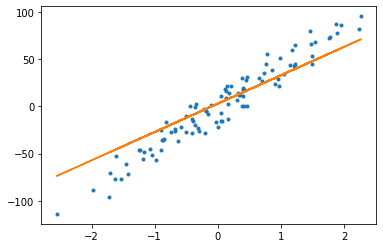

Epoch: 2, best: 225.91 | m: 51.95671231560014, c: 3.441372604065642


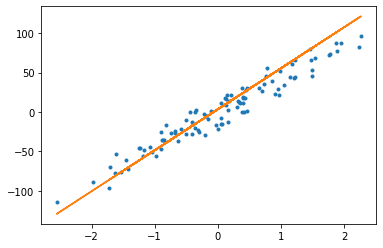

Epoch: 4, best: 680.52 | m: 62.16007814680639, c: 11.376484532655573


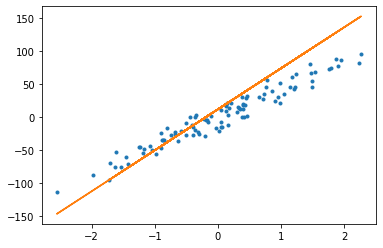

Epoch: 6, best: 573.18 | m: 46.39172626378534, c: 20.044614597419777


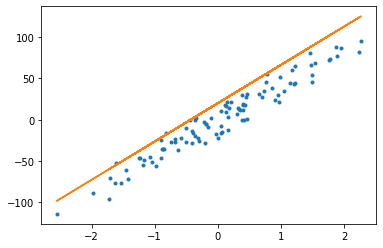

Epoch: 8, best: 194.25 | m: 39.29435308363006, c: 7.682157667681388


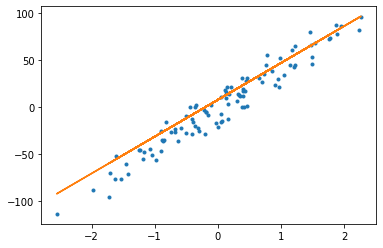

Epoch: 10, best: 307.92 | m: 42.70381047655797, c: 13.10000282210751


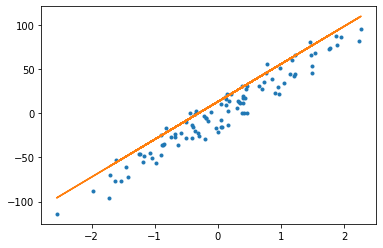

Epoch: 12, best: 207.86 | m: 47.408900803003554, c: 7.289317744767661


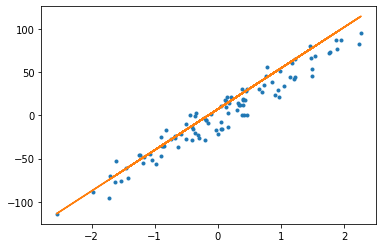

Early Stop at 13 iteration because do not impove after 5 iteration
Global Best Possition: 180.07761628572473 | m: 35.28537093505716, c: 2.981001716735524


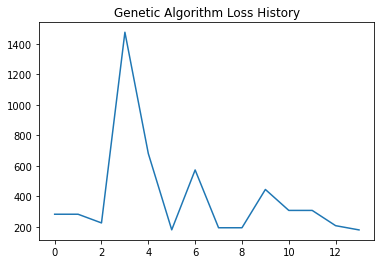

In [14]:
import numpy as np

np.random.seed(42)

class Individu:
    def crossover(p1, p2):
        max_gradien = p1.max_gradien
        learning_rate = p1.learning_rate
        return [
                Individu(p1.c, p2.m, learning_rate=learning_rate, max_gradien=max_gradien), 
                Individu(p2.c, p1.m, learning_rate=learning_rate, max_gradien=max_gradien)
                ]

    def __init__(self, c=0, m=0, learning_rate=0.001, max_gradien=10):
        self.c = c
        self.m = m
        self.learning_rate = learning_rate
        self.max_gradien = max_gradien
        self.loss = "HAVENT BEEN CALCULATED"
        if c == 0:
            self.c = np.random.random() * max_gradien # kali apa lagi ???
        if m == 0:
            self.m = np.random.random() * max_gradien # kali apa lagi ???

    def calculateLoss(self, x_train, y_train):
        y_pred = self.predict(x_train)
        n = len(y_train)
        sum = 0
        for i in range(n):
            sum += (y_train[i] - y_pred[i]) ** 2

        self.loss = sum/n
        return self.loss

    def predict(self, x_train):
        return self.m * x_train + self.c

    # GA Method
    def mutate(self, key):
        if key == "c":
            self.c = np.random.random() * self.max_gradien
        if key == "m":
            self.m = np.random.random() * self.max_gradien

# defining Genetic Algorithm
class LinearRegressionGeneticAlgorithm:

    def __init__(self, initial_population=10, learning_rate=0.001):
        self.initial_population = initial_population
        self.learning_rate = learning_rate
        self.selection_size = int(learning_rate * initial_population)
        if self.selection_size <= 2:
            self.selection_size = 2
        self.r_cross = 0.9 - 1 * learning_rate
        self.mutation_rate = 0.01 + 1 * learning_rate
        self.population = []
        self.prev_best_list = []

    
    def updateParameters(self):
        self.selection_size = int(self.learning_rate * len(self.population))
        if self.selection_size <= 2:
            self.selection_size = 2


    def initialize_population(self):
        max_x = max(self.y_train)
        print(max_x)
        population = []
        for i in range(self.initial_population):
            population.append(Individu(max_gradien=max_x))
        return population

    def calculate_fit(self):
        # Calculate All loss function for every individu (MSE)
        loss_values = [individu.calculateLoss(self.x_train, self.y_train) for individu in self.population]
        # We always want to maximize fit function, but loss is larger given more error they have
        fit_values = [1 / (1 + loss) for loss in loss_values]

        # We also will normalize the function
        sum_fit_values = sum(fit_values)
        fit_values /= sum_fit_values

        return fit_values


    def selection(self):
        # Evaluate Individual Fitnes Function:
        fit_values = self.calculate_fit()

        # Roulete Selection
        roulete_wheel = []
        prev_fit = 0
        for fit in fit_values:
            roulete_wheel.append(prev_fit + fit)
            prev_fit += fit
        # Choosing from roulete
        selected_population = []
        for _ in range(self.initial_population):
            choose = np.random.random()
            for pop_index, chances in enumerate(roulete_wheel):
                if chances[0] >= choose:
                    selected_population.append(self.population[pop_index])
                    break
        
        return selected_population

    def crossover(self, p1, p2):
        c1, c2 = p1, p2
        if np.random.random() < self.r_cross:
            c1, c2 = Individu.crossover(p1, p2)
        return [c1, c2]

    def generate_new_generation(self, selected_population, best_individu):
        new_population = []
        for parent_idx in range(len(selected_population) - 1):
            p1 = parent_idx
            p2 = parent_idx + 1
            children = self.crossover(selected_population[p1],selected_population[p2])
            new_population.extend(children)

        if best_individu is not None:
            new_population.append(best_individu)

        return new_population

    

    # Showing Results:
    def show_results(self, epoch_num):
        print("-------------------------------------")
        for idx, individu in enumerate(self.population):
            print("{:d}. c:{:.2f} m:{:.2f}, loss:{}".format(
                idx, individu.c, individu.m, individu.calculateLoss(self.x_train, self.y_train)[0]))


    def mutate_population(self, new_population):
        for individu in new_population[:-1]:
            if self.mutation_rate <  np.random.random():
                individu.mutate("c")
            if self.mutation_rate <  np.random.random():
                individu.mutate("m")
        return new_population
        
    def evaluate_population(self, population):
        best_loss =0 
        best_idx = 0
        for idx, individu in enumerate(population):
            individu.calculateLoss(self.x_train, self.y_train)
            if idx == 0:
                best_loss = individu.loss
                best_idx = idx
            if individu.loss < best_loss:
                best_idx = idx
                best_loss = individu.loss
        
        pBest_loss = 0
        is_stopped = False
        if len(self.prev_best_list) > 5 :
            is_stopped = True
            for pBest_loss in self.prev_best_list[-5:]:
                if best_loss > pBest_loss:
                    is_stopped = False
                    break    

        self.prev_best_list.append(best_loss)
        return population[best_idx], is_stopped
        

    def fit(self, x_train, y_train, epoch=1000):
        self.x_train = x_train
        self.y_train = y_train

        # Initialize Population
        self.population = self.initialize_population()
        self.prev_best_list = []

        global_best = None
        best = None
        for i in range(epoch):
            # Selection
            selected_population = self.selection()
            # Corssover
            new_population = self.generate_new_generation(selected_population, best)
            # Mutation
            new_population = self.mutate_population(new_population)
            # Compute Fitness
            best, is_stopped = self.evaluate_population(new_population)

            # Modifier:
            # - Add Best to population to preserve the every last best to the next
            new_population.append(best)

            if i % (epoch // 10) == 0:
                print("Epoch: {}, best: {:.02f} | m: {}, c: {}".format(i, best.loss[0], best.m, best.c))
                y_pred = best.predict(x_train)
                plt.ion()
                _ = plt.plot(x_train,y_train, ".", label="training data")
                _ = plt.plot(x_train, y_pred)
                plt.show()
            
            if global_best is None or global_best.loss[0] > best.loss[0]:
                global_best = best
            
            if is_stopped:
                print("Early Stop at {} iteration because do not impove after 5 iteration".format(i))
                break
            
            # Show new population every loss
            # print("New Population", [individu.loss[0] for individu in new_population])
            # Updating Parameters
            self.updateParameters()
            self.population = new_population
            
        return global_best, self.prev_best_list


GA_model = LinearRegressionGeneticAlgorithm(initial_population=10, learning_rate=0.001)
global_best, loss_list = GA_model.fit(x, y, epoch=20)
print("Global Best Possition: {} | m: {}, c: {}".format(global_best.loss[0], global_best.m, global_best.c))
plt.title("Genetic Algorithm Loss History")
plt.plot(loss_list)
plt.show()